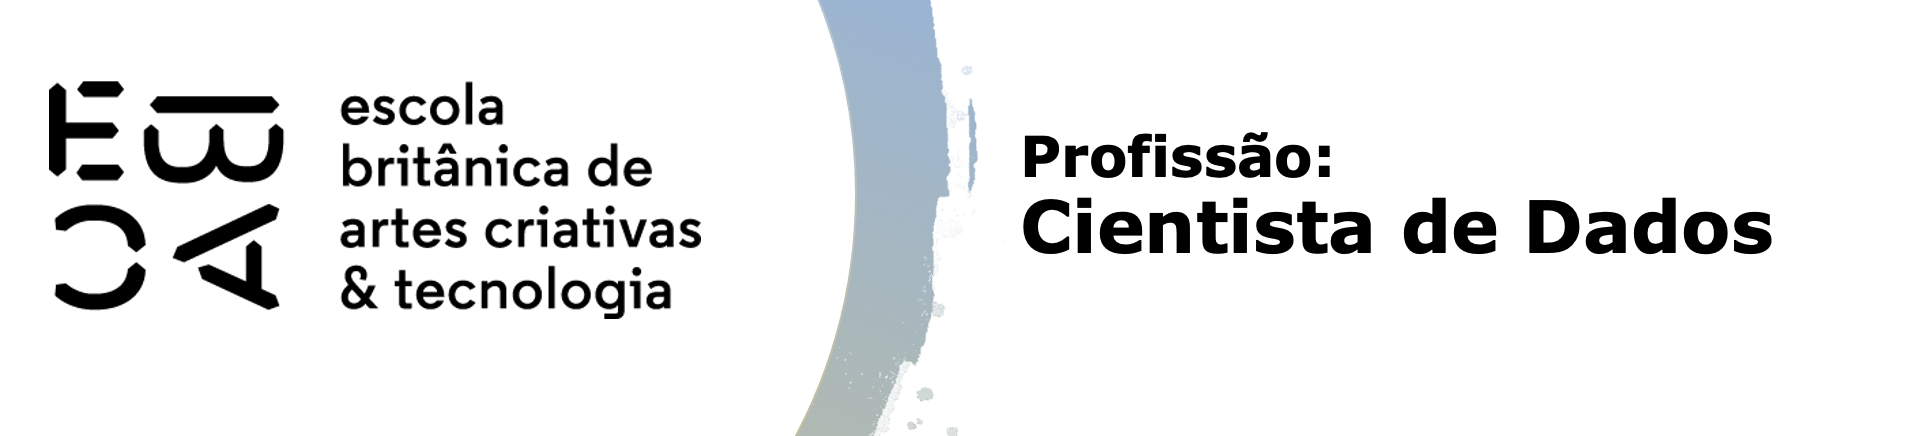

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import os
import time

In [11]:
# Carregar os arquivos salvos anteriormente
train_data = pd.read_csv("train_data.csv", index_col=[0, 1])  # Índice duplo
test_data = pd.read_csv("test_data.csv", index_col=[0, 1])  # Índice duplo

# Caminho base para os arquivos originais
base_path = r'C:\Users\Zghos\Desktop\CursoEBAC\CientistaDados\Mod17\UCI HAR Dataset'

# Carregar os rótulos das atividades (y_train e y_test)
y_train = pd.read_csv(os.path.join(base_path, 'train/y_train.txt'), header=None, names=['activity'])
y_test = pd.read_csv(os.path.join(base_path, 'test/y_test.txt'), header=None, names=['activity'])

# Combinar os rótulos às bases originais
train_data['activity'] = y_train.values
test_data['activity'] = y_test.values

# Separar variáveis explicativas (X) e rótulos (y)
X_train = train_data.drop(columns=['activity'])
y_train = train_data['activity']

X_test = test_data.drop(columns=['activity'])
y_test = test_data['activity']

# Verificar dimensões
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7352, 3)
y_train shape: (7352,)
X_test shape: (2947, 3)
y_test shape: (2947,)


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

ccp_alphas: [0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 5.84401136e-05 6.17808017e-05 6.59866112e-05 6.73768888e-05
 7.02851049e-05 7.74168145e-05 7.99585551e-05 8.01474017e-05
 8.28222484e-05 8.29342439e-05 8.49667199e-05 9.21474511e-05
 9.63598696e-05 1.02953015e-04 1.04280015e-04 1.05722623e-04
 1.06211126e-04 1.10109332e-04 1.20580361e-04 1.24186720e-04
 1.32053657e-04 1.35233977e-04 1.36017410e-04 1.41963138e-04
 1.46351627e-04 1.47352194e-04 1.49244166e-04 1.49492770e-04
 1.50482754e-04 1.51968146e-04 1.55713461e-04 1.60511546e-04
 1.60628990e-04 1.64239147e-04 1.67323005e-04 1.74342668e-04
 1.74907961e-04 1.75578030e-04 1.78985873e-04 1.81439304e-04
 1.85996704e-04 1.87333070e-04 1.89065980e-04 1.89796602e-04
 1.96759215e-04 2.01481091e-04 2.01919050e-04 2.02866775e-04
 2.03119333e-04 2.03378413e-04 2.03817707e-04 2.04208078e-04
 2.05459167e-04 2.05888258e-04 2.06087949e-04 2.07617553e-04
 2.08114530e

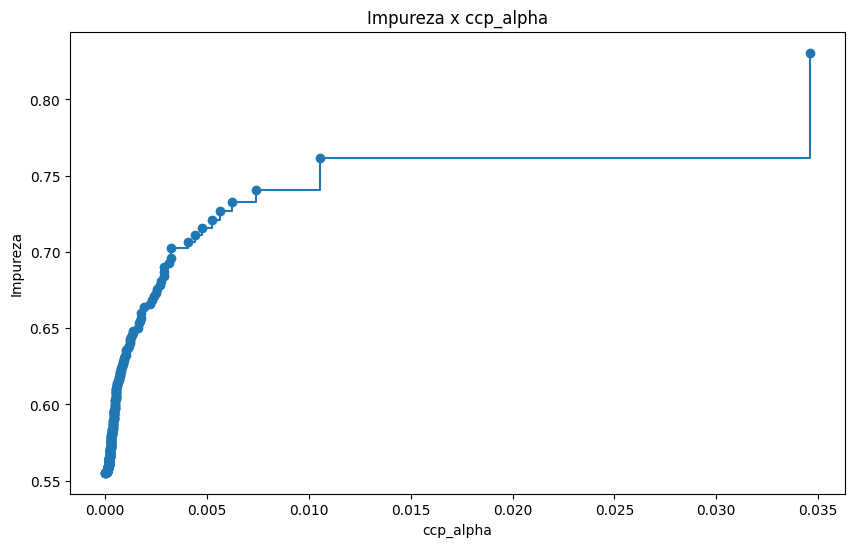

In [13]:
# Selecionar as 3 melhores variáveis (substitua 'var1', 'var2', 'var3' pelos nomes reais das variáveis identificadas)
top_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Configurar e treinar o modelo com min_samples_leaf=20
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)

# Calcular o caminho de poda
caminho = clf.cost_complexity_pruning_path(X_train_top, y_train)
ccp_alphas = caminho.ccp_alphas  # Valores de ccp_alpha
impurities = caminho.impurities  # Impurezas associadas

# Exibir os resultados
print("ccp_alphas:", ccp_alphas)
print("impurities:", impurities)

# Visualizar a relação entre ccp_alpha e impureza
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Impureza")
plt.title("Impureza x ccp_alpha")
plt.show()

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [21]:
# Filtrar os valores de ccp_alpha
ccp_alphas_reduzidos = ccp_alphas[::10]  # Selecionar 1 a cada 10 valores

# Variáveis top 3 (já definidas anteriormente)
X_train_top = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
y_train_top = y_train

# Medir o tempo
inicio = time.time()

# Resultados
melhor_score = 0
melhor_alpha = None

# Cross-validation com k=10
for alpha in ccp_alphas_reduzidos:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, min_samples_leaf=20)
    scores = cross_val_score(clf, X_train_top, y_train_top, cv=10)  # K-fold
    media_score = scores.mean()

    if media_score > melhor_score:  # Atualizar o melhor alpha
        melhor_score = media_score
        melhor_alpha = alpha

fim = time.time()

# Exibir resultados
print(f"Melhor ccp_alpha: {melhor_alpha}")
print(f"Melhor média de acurácia (cross-validation): {melhor_score*100:.2f}%")
print(f"Tempo total de execução: {fim - inicio:.2f} segundos")

Melhor ccp_alpha: 0.00048384996698380874
Melhor média de acurácia (cross-validation): 45.67%
Tempo total de execução: 8.86 segundos


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Acurácia na base de testes: 43.98%


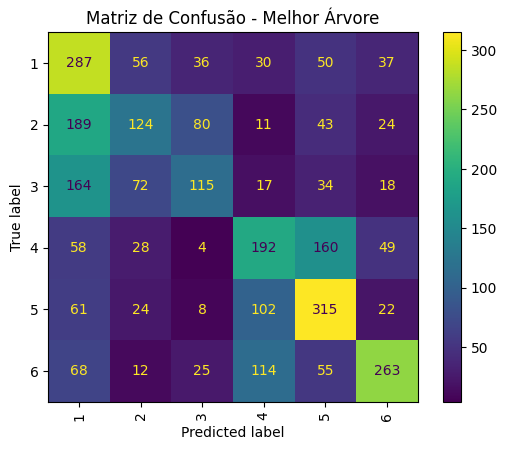

In [25]:
# Treinar a árvore com o melhor ccp_alpha encontrado em toda a base de treino
melhor_arvore = DecisionTreeClassifier(random_state=42, ccp_alpha=0.00048384996698380874, min_samples_leaf=20)
melhor_arvore.fit(X_train_top, y_train_top)

# Fazer previsões na base de testes
y_pred = melhor_arvore.predict(X_test_top)

# Calcular a acurácia na base de testes
acuracia_teste = accuracy_score(y_test, y_pred)
print(f"Acurácia na base de testes: {acuracia_teste * 100:.2f}%")

# Visualizar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, labels=melhor_arvore.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=melhor_arvore.classes_)

disp.plot(cmap="viridis", xticks_rotation="vertical")
plt.title("Matriz de Confusão - Melhor Árvore")
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [39]:
# Caminhos dos arquivos
train_path = r"C:\Users\Zghos\Desktop\CursoEBAC\CientistaDados\Mod17\UCI HAR Dataset\train"
test_path = r"C:\Users\Zghos\Desktop\CursoEBAC\CientistaDados\Mod17\UCI HAR Dataset\test"

# Carregar x_train e y_train
x_train = pd.read_csv(os.path.join(train_path, "x_train.txt"), sep=r'\s+', header=None)
y_train = pd.read_csv(os.path.join(train_path, "y_train.txt"), sep=r'\s+', header=None, names=['activity'])

# Carregar x_test e y_test
x_test = pd.read_csv(os.path.join(test_path, "x_test.txt"), sep=r'\s+', header=None)
y_test = pd.read_csv(os.path.join(test_path, "y_test.txt"), sep=r'\s+', header=None, names=['activity'])

# Exibir dimensões dos dados carregados
print("Dimensões dos dados:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

Dimensões dos dados:
x_train: (7352, 561)
y_train: (7352, 1)
x_test: (2947, 561)
y_test: (2947, 1)


In [43]:
# Caminho para o arquivo features.txt
features_path = r"C:\Users\Zghos\Desktop\CursoEBAC\CientistaDados\Mod17\UCI HAR Dataset\features.txt"

# Carregar os nomes das features
features = pd.read_csv(features_path, delim_whitespace=True, header=None, names=['index', 'feature_name'])

# Renomear as colunas de x_train e x_test
x_train.columns = features['feature_name']
x_test.columns = features['feature_name']

# Verificar se as colunas foram renomeadas corretamente
print("Colunas de x_train:", x_train.columns[:10])  # Exibe as 10 primeiras colunas

Colunas de x_train: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X'],
      dtype='object', name='feature_name')


C:\Users\Zghos\AppData\Local\Temp\ipykernel_11556\4122217443.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(features_path, delim_whitespace=True, header=None, names=['index', 'feature_name'])


In [45]:
# Configurar e treinar a árvore inicial para calcular a importância das variáveis
clf_inicial = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
clf_inicial.fit(x_train, y_train.values.ravel())  # ravel para evitar warnings

# Obter a importância das variáveis
importances = pd.DataFrame({
    'variavel': x_train.columns,
    'importancia': clf_inicial.feature_importances_
})

# Ordenar pela importância e selecionar as 3 melhores variáveis
melhores_variaveis = importances.sort_values(by='importancia', ascending=False).head(3)
print("As 3 melhores variáveis são:")
print(melhores_variaveis)

# Selecionar as 3 melhores variáveis para o modelo
top_features = melhores_variaveis['variavel'].tolist()
X_train_top = x_train[top_features]
X_test_top = x_test[top_features]

print("Variáveis selecionadas:", top_features)
print("Dimensões de X_train_top:", X_train_top.shape)

As 3 melhores variáveis são:
                            variavel  importancia
52               tGravityAcc-min()-X     0.257544
389  fBodyAccJerk-bandsEnergy()-1,16     0.216098
559             angle(Y,gravityMean)     0.141766
Variáveis selecionadas: ['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']
Dimensões de X_train_top: (7352, 5)


ccp_alphas: [0.00000000e+00 4.63012404e-06 6.42616690e-06 6.59906426e-06
 7.93434893e-06 7.93434893e-06 9.28372800e-06 1.11286972e-05
 1.11943532e-05 1.14835806e-05 3.80848749e-05 3.92157476e-05
 4.06330491e-05 5.10908371e-05 5.28956595e-05 5.79313786e-05
 5.87197700e-05 5.95406071e-05 6.19512496e-05 7.11824447e-05
 9.67065108e-05 9.78572588e-05 9.81779803e-05 1.03220139e-04
 1.08813928e-04 1.16405598e-04 1.17256388e-04 1.20707724e-04
 1.20904365e-04 1.23282447e-04 1.60553884e-04 1.65586412e-04
 1.96543171e-04 2.08900447e-04 2.29529380e-04 2.50753451e-04
 2.60839356e-04 2.64456355e-04 2.94910476e-04 2.97589607e-04
 3.03438047e-04 3.08395030e-04 3.52008052e-04 3.69359008e-04
 3.88045476e-04 4.34726287e-04 4.49964938e-04 4.65842879e-04
 4.68285049e-04 4.93786808e-04 5.10764317e-04 5.28163428e-04
 5.38549287e-04 5.51344323e-04 5.93039605e-04 6.03572253e-04
 6.33848328e-04 6.60330748e-04 6.63732577e-04 7.53896654e-04
 7.57820486e-04 7.77541471e-04 7.84226261e-04 7.97091921e-04
 8.07183076e

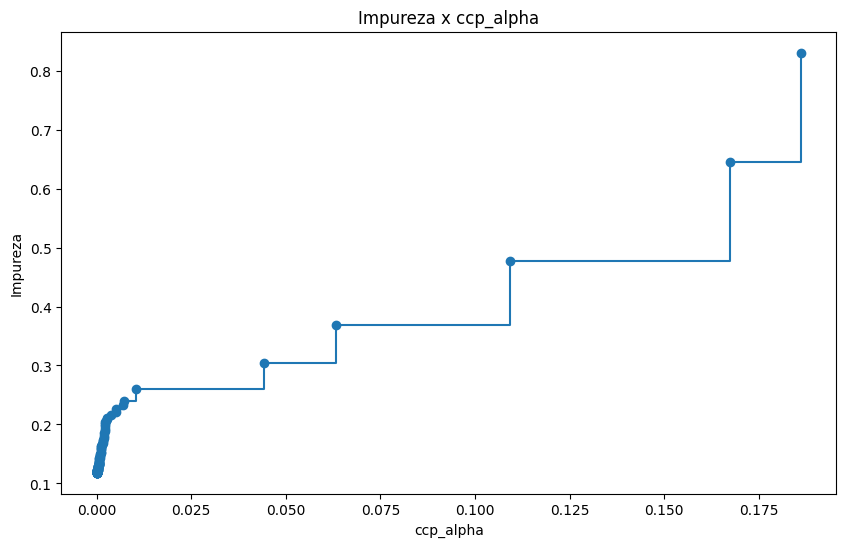

In [47]:
# Configurar e treinar o modelo com as 3 melhores variáveis
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)

# Calcular o caminho de poda (ccp_alpha)
caminho = clf.cost_complexity_pruning_path(X_train_top, y_train.values.ravel())
ccp_alphas = caminho.ccp_alphas  # Valores de ccp_alpha
impurities = caminho.impurities  # Impurezas associadas

# Exibir os valores de ccp_alphas
print("ccp_alphas:", ccp_alphas)

# Visualizar a relação entre ccp_alpha e impureza
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Impureza")
plt.title("Impureza x ccp_alpha")
plt.show()

In [49]:
# Selecionar os valores reduzidos de ccp_alpha
ccp_alphas_reduzidos = ccp_alphas[::10]  # Selecionar 1 a cada 10 valores

# Medir o tempo de execução
inicio = time.time()

# Inicializar variáveis para armazenar o melhor resultado
melhor_alpha = None
melhor_score = 0

# Testar diferentes valores de ccp_alpha
for alpha in ccp_alphas_reduzidos:
    # Configurar o modelo com o ccp_alpha atual
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, min_samples_leaf=20)
    
    # Realizar validação cruzada (K-Fold com k=10)
    scores = cross_val_score(clf, X_train_top, y_train.values.ravel(), cv=10)
    media_score = scores.mean()  # Média das acurácias nos folds
    
    # Atualizar o melhor resultado
    if media_score > melhor_score:
        melhor_score = media_score
        melhor_alpha = alpha

fim = time.time()

# Exibir os resultados
print(f"Melhor ccp_alpha: {melhor_alpha}")
print(f"Melhor média de acurácia (cross-validation): {melhor_score * 100:.2f}%")
print(f"Tempo total de execução: {fim - inicio:.2f} segundos")

Melhor ccp_alpha: 0.005148850551836209
Melhor média de acurácia (cross-validation): 81.39%
Tempo total de execução: 3.90 segundos


Acurácia na base de testes: 71.16%


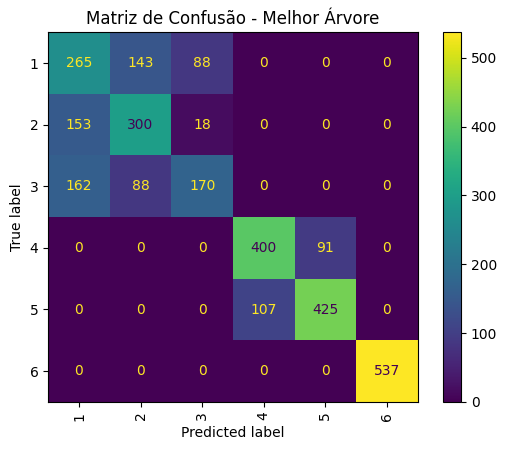

In [51]:
# Treinar a árvore com o melhor ccp_alpha encontrado em toda a base de treino
melhor_arvore = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005148850551836209, min_samples_leaf=20)
melhor_arvore.fit(X_train_top, y_train.values.ravel())

# Fazer previsões na base de testes
y_pred = melhor_arvore.predict(X_test_top)

# Calcular a acurácia na base de testes
acuracia_teste = accuracy_score(y_test, y_pred)
print(f"Acurácia na base de testes: {acuracia_teste * 100:.2f}%")

# Visualizar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred, labels=melhor_arvore.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=melhor_arvore.classes_)

disp.plot(cmap="viridis", xticks_rotation="vertical")
plt.title("Matriz de Confusão - Melhor Árvore")
plt.show()

### A Acurácia melhorou bastante subindo de 45.67% para 71.16%